# Salary Dataset Analysis (Practice Notebook)

This notebook demonstrates a small reporting-style analysis using **Pandas** and **Matplotlib** on a salary dataset exported as CSV.



## Dataset

Place the CSV file (example name: `salary_fix_en.csv`) in the same folder as this notebook (or update the path in the next cell).



### Expected columns (example)

The analysis assumes columns similar to the following:

- `RegNumber` — unique employee ID
- `Position` — job title
- `Stake` — workload ratio (e.g., 0.5, 1.0, 1.25)
- `Staff Salary` — base salary for staff employees
- `Extra or Outstuff Salary` — extra pay for staff or pay for external/outstaffed workers
- `Hourly Payment` — hourly pay (if applicable)
- `Total` — total payout for the record

(If your CSV uses different column names, rename them in code.)



## Notes

- Treat *staff* workers as those who have `Staff Salary` > 0.
- Treat *outstaffed/external* workers as those who have `Staff Salary` == 0.

The goal is to practice filtering, grouping, aggregation, and simple plotting.



## Task 1 — Wage fund summaries

Compute total payout (wage fund) for:
- the whole dataset (`r1a`)
- each position (`r1b`)
- staff only (`r1c`)
- outstaffed/external only (`r1d`)




## Imports



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data



In [2]:
df = pd.read_csv('salary_fix_en.csv',
                 encoding='cp1251',
                 sep=',',
                 decimal='.')

df


,RegNumber,Position,Stake,Staff Salary,Extra or Outstuff Salary,Hourly payment,Total
0,160697,Associate Professor,1.50,9830.00,4915.00,5284.76,21663.83
1,2226,Associate Professor,0.50,4915.00,NaN,NaN,7185.72
2,302429,Associate Professor,0.05,NaN,491.50,NaN,534.51
3,302429,Associate Professor,0.45,NaN,4423.50,NaN,4810.56
4,1139,Associate Professor,1.20,9830.00,1966.00,NaN,16231.29
...,...,...,...,...,...,...,...
894,2194,Senior Lecturer,1.00,5392.00,4311.50,NaN,11961.78
895,4641,Associate Professor,1.35,9830.00,3440.50,NaN,19401.48
896,103087,Associate Professor,1.00,9830.00,4915.00,NaN,20289.12
897,1149,Professor,1.00,11065.00,3138.30,NaN,25113.77


In [3]:
r1a = df['Total'].sum()
print('University:', r1a)

University: 10679949.92


In [4]:
r1b = df.groupby('Position')['Total'].sum().sort_values(ascending=True)
print('By Position:')
print('\n')
print(r1b)


By Position:


Position
Lecturer                452619.67
Assistant              1034563.40
Professor              1440885.75
Senior Lecturer        2480608.09
Associate Professor    5271273.01
Name: Total, dtype: float64


In [5]:
r1c = df.loc[df['Staff Salary'] > 0, 'Total'].fillna(0).sum()
print('Staff only:', r1c)

Staff only: 9820882.83


In [6]:
df['Staff Salary'] = pd.to_numeric(df['Staff Salary'], errors='coerce').fillna(0)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce').fillna(0)


r1d = df.loc[df['Staff Salary'] == 0, 'Total'].sum()
print('Outstuffed only WF:', r1d)

Outstuffed only WF: 859067.0899999999


## Task 2 — Stakes by position (pie chart)



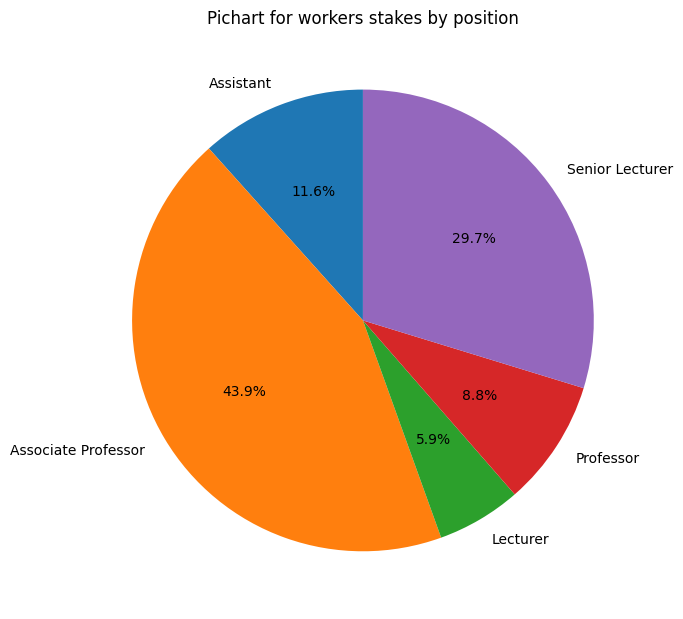

In [7]:
stake_by_position = df.groupby('Position')['Stake'].sum()

plt.figure(figsize=(7,7))
plt.pie(
    stake_by_position,
    labels=stake_by_position.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Pichart for workers stakes by position')
plt.tight_layout()
plt.show()





## Task 3 — Assistant pay (min/mean/max)

Filter to `Position == 'Assistant'` and compute min/mean/max of `Total`.



In [8]:

assistants = df[df['Position'] == 'Assistant'].fillna(0)

r3a = assistants['Total'].min()
r3b = assistants['Total'].mean()
r3c = assistants['Total'].max()

print('r3a minimal:', r3a)
print('r3b mean:', r3b)
print('r3c maximal:', r3c)


r3a minimal: 1046.48
r3b mean: 7234.70909090909
r3c maximal: 20019.5


## Task 4 — External Associate Professors summary

Filter to outstaffed Associate Professors and build a table grouped by `RegNumber` with:
- `Stakes` (sum of `Stake`)
- `Total` (sum of `Total`)

Save the grouped table as `r4a` and count the number of grouped workers as `r4b`.



In [9]:
staff_regs = df.loc[df['Staff Salary'] > 0, 'RegNumber'].astype(str).str.strip().unique()

out_ap = df[
    (df['Position'] == 'Associate Professor') &
    (df['Staff Salary'] == 0) &
    (~df['RegNumber'].isin(staff_regs))
]

r4a = (out_ap.groupby('RegNumber', as_index=False)
                 .agg(Stakes=('Stake', 'sum'),
                      Total=('Total', 'sum'))
                 .round({'Stakes': 2, 'Total': 2})
                 .sort_values('RegNumber')
                 .reset_index(drop=True))

r4b = r4a.shape[0]

print('Outstuffed associate professors:', r4b)
print('\n')
print(r4a.to_string(index=False))


Outstuffed associate professors: 66


 RegNumber  Stakes   Total
       527    0.25 3592.87
      1032    0.10 1352.61
      1053    0.15 2180.79
      1244    0.40 5580.12
      1250    0.20 2874.29
      1287    0.40 5748.59
      1341    0.25 3634.65
      1404    0.10 1453.86
      1462    0.35 5030.02
      1469    0.50 6341.94
      1576    0.50 7269.28
      1775    0.35 5030.02
      1933    0.30 4311.44
      2099    0.25 2688.23
      2327    0.25 3592.87
      2397    0.50 7185.73
      2652    0.50 7185.74
      2672    0.20 2093.99
      2797    0.50 6841.68
      3451    0.30 3003.40
      4232    0.50 6629.32
      4319    0.20  507.23
      4420    0.50 4709.16
      5196    0.30 4311.46
      5504    0.25 2993.24
      5601    0.25 7542.73
      9709    0.50 7269.28
      9931    0.25 3634.65
     70184    0.50 6763.04
     73648    0.30 4311.44
     74235    0.50 6414.07
     74317    0.50 7185.74
    100784    0.50 6763.04
    102413    0.50 7269.28
    103197    0.1

## Task 5 — Staff worker total pay (min/mean/max)



In [10]:
staff_workers = df[df['Staff Salary'].fillna(0) > 0]

r5a = staff_workers['Total'].min()
r5b = staff_workers['Total'].mean()
r5c = staff_workers['Total'].max()

print('Minimal salary:', r5a)
print('Mean salary:', r5b)
print('Maximal salary:', r5c)


Minimal salary: 896.53
Mean salary: 14316.155728862974
Maximal salary: 42974.95


## Task 6 — External worker stake stats (min/mean/max)



In [11]:

outstuffed = df[df['Staff Salary'].fillna(0) == 0]

r6a = outstuffed['Stake'].min()
r6b = outstuffed['Stake'].mean()
r6c = outstuffed['Stake'].max()

print('Outstuffed minimal:', r6a)
print('Outstuffed mean:', r6b)
print('Outstuffed maximal:', r6c)


Outstuffed minimal: 0.05
Outstuffed mean: 0.3424882629107981
Outstuffed maximal: 0.5


## Task 7 — Associate Professors with exactly 1.0 total stake

Group by `RegNumber`, sum `Stake`, and keep those equal to 1.0.



In [12]:
as_prof = df[df['Position'] == 'Associate Professor']
stake = as_prof.groupby('RegNumber')['Stake'].sum()
r7a = stake[stake == 1.0]


print(r7a)


RegNumber
114       1.0
540       1.0
577       1.0
585       1.0
1204      1.0
1504      1.0
1595      1.0
1616      1.0
1651      1.0
2012      1.0
2257      1.0
2263      1.0
2293      1.0
2328      1.0
2383      1.0
2403      1.0
2454      1.0
2774      1.0
2937      1.0
3027      1.0
4544      1.0
5230      1.0
5703      1.0
70766     1.0
70812     1.0
73454     1.0
74326     1.0
74332     1.0
74763     1.0
100364    1.0
103087    1.0
105887    1.0
106038    1.0
141369    1.0
155716    1.0
160830    1.0
161208    1.0
164775    1.0
165021    1.0
165283    1.0
302474    1.0
303567    1.0
Name: Stake, dtype: float64


## Task 8 — Most underloaded staff worker(s)

Find the minimum `Stake` among staff workers and print their `RegNumber` and `Stake`.



In [13]:
staff_workers = df[df['Staff Salary'].fillna(0) > 0]

min_stake = staff_workers['Stake'].min()

r8a = staff_workers.loc[
    staff_workers['Stake'] == min_stake,
    ['RegNumber', 'Stake']
]

print('Most underloaded staff worker and their RegNumbers and stakes')
print('\n')
print(r8a)

Most underloaded staff worker and their RegNumbers and stakes


     RegNumber  Stake
156     301469    0.1
286        583    0.1
758      70032    0.1
786       8593    0.1
833       2018    0.1


## Task 9 — Cumulative wage-fund curves

Sort salaries from low to high and plot cumulative sums for:
- whole dataset
- staff only
- outstaffed/external only




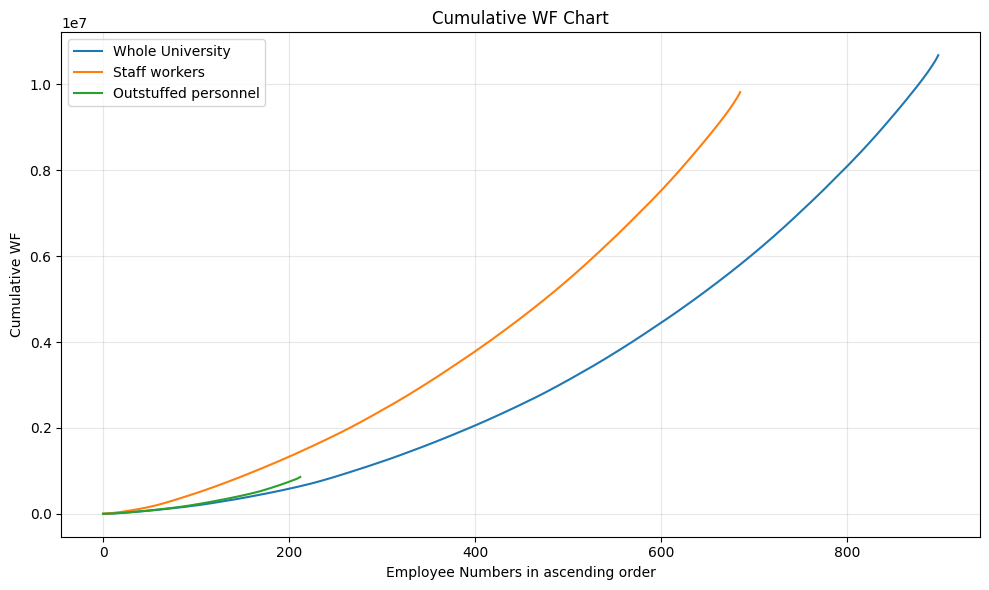

In [14]:
staff = df[df['Staff Salary'].fillna(0) > 0]
outstuffed = df[df['Staff Salary'].fillna(0) == 0]

uni_cum = df['Total'].sort_values().cumsum()
staff_cum = staff['Total'].sort_values().cumsum()
out_cum = outstuffed['Total'].sort_values().cumsum()

plt.figure(figsize=(10,6))

plt.plot(uni_cum.values, label='Whole University')
plt.plot(staff_cum.values, label='Staff workers')
plt.plot(out_cum.values, label='Outstuffed personnel')

plt.title('Cumulative WF Chart')
plt.xlabel('Employee Numbers in ascending order')
plt.ylabel('Cumulative WF')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

